# K-Nearest Neighbor (KNN)

### Overview
Following is a walkthrough of the exeuction of KNN.

We will use the following dataset of ECommerce Fraud. Link: https://www.kaggle.com/datasets/aryanrastogi7767/ecommerce-fraud-data
We will use the cleaned up data of this dataset for understanding the KNN.



In [1]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 80)

import os
# for dirname, _, filenames in os.walk('../../Data/ECom_Fraud_Dataset/'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# We will import the data set

In [2]:
df = pd.read_csv('../../Data/ECom_Fraud_Dataset/Fraud_Transaction_data.csv')

# Check the shape of the data
print("Shape of Customer Data:", df.shape)

# Display the first few rows of each DataFrame
print("\nCustomer Data Sample:")
df.head()

Shape of Customer Data: (143, 32)

Customer Data Sample:


,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,No_transactionsFail,Total_transaction_amt,PaymentRegFail,PaypalPayments,ApplePayments,CardPayments,BitcoinPayments,OrdersFulfilled,OrdersPending,OrdersFailed,JCB_16,AmericanExp,VISA_16,Discover,Voyager,VISA_13,Maestro,Mastercard,DC_CB,JCB_15,Trns_fail_order_fulfilled,Duplicate_IP,Duplicate_Address,Fraud
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,0,44,2,0,0,2,0,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,False
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1,111,1,0,0,0,3,3,0,0,0,2,1,0,0,0,0,0,0,0,1,0,0,True
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,2,131,0,0,0,5,0,4,0,1,4,0,0,1,0,0,0,0,0,0,2,0,0,False
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,0,85,0,0,0,3,0,3,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,False
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,2,411,0,0,3,4,0,6,0,1,3,1,2,0,0,1,0,0,0,0,2,0,0,True


In [3]:
print(df.info())
print("*", "-"*50, "*")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   customerEmail              143 non-null    object
 1   customerPhone              143 non-null    object
 2   customerDevice             143 non-null    object
 3   customerIPAddress          143 non-null    object
 4   customerBillingAddress     143 non-null    object
 5   No_Transactions            143 non-null    int64 
 6   No_Orders                  143 non-null    int64 
 7   No_Payments                143 non-null    int64 
 8   No_transactionsFail        143 non-null    int64 
 9   Total_transaction_amt      143 non-null    int64 
 10  PaymentRegFail             143 non-null    int64 
 11  PaypalPayments             143 non-null    int64 
 12  ApplePayments              143 non-null    int64 
 13  CardPayments               143 non-null    int64 
 14  BitcoinPay

In [4]:
# Check for duplicates in DataFrame
duplicates_data1 = df.duplicated().sum()
print("\nDuplicates in Customer Data:", duplicates_data1)

# Check for missing values in both DataFrames
missing_data1 = df.isnull().sum()
print("\nMissing Values in Customer Data:\n", missing_data1[missing_data1 > 0])



Duplicates in Customer Data: 0

Missing Values in Customer Data:
 Series([], dtype: int64)


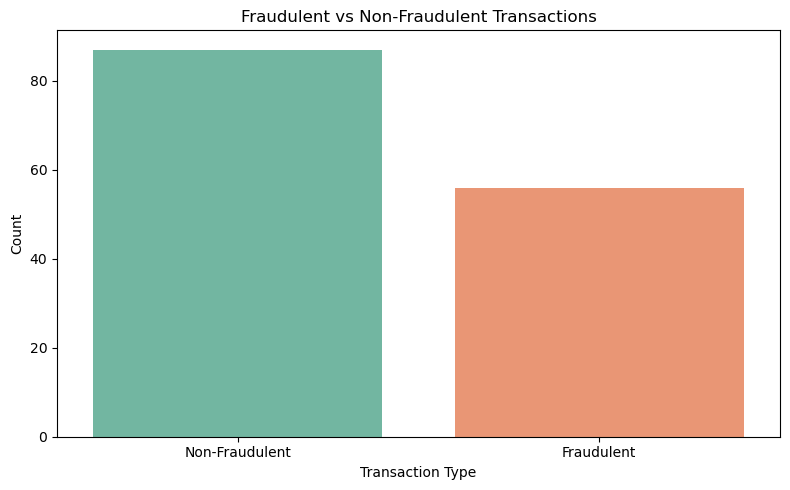

In [5]:
# Show the fraud and non-fraud transaction count
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Fraud', palette='Set2')
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent', 'Fraudulent'])
plt.tight_layout()
plt.show()

In [6]:
# Create the feature set and target variable
x = df.drop(['customerEmail','customerPhone', 'customerDevice', 'customerIPAddress',
       'customerBillingAddress','Fraud'], axis=1)
y = df['Fraud']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)

(114, 26)
(29, 26)


In [7]:
# KNN
test_error_rate=[]
for k in range(1,30):
    knn_midel=KNeighborsClassifier(n_neighbors=k)
    knn_midel.fit(x_train,y_train)
    y_p_test=knn_midel.predict(x_test)
    test_error=1-accuracy_score(y_test,y_p_test)
    test_error_rate.append(test_error)

              precision    recall  f1-score   support

       False       0.82      1.00      0.90        18
        True       1.00      0.64      0.78        11

    accuracy                           0.86        29
   macro avg       0.91      0.82      0.84        29
weighted avg       0.89      0.86      0.85        29



<Axes: >

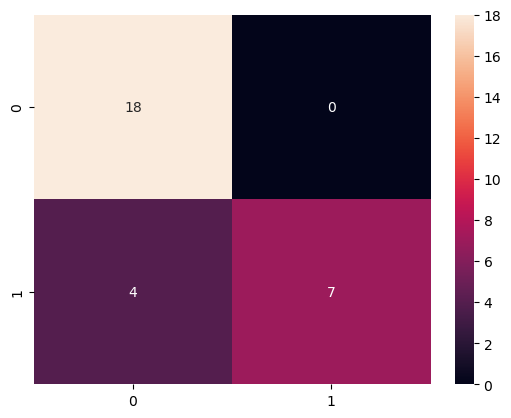

In [8]:
knn_model = KNeighborsClassifier(n_neighbors = 6)
knn_model = knn_model.fit(x_train,y_train)
y_pred_knn = knn_model.predict(x_test)
print(classification_report(y_test, y_pred_knn))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot = True)